# Lab | Web Scraping

Welcome to the "Books to Scrape" Web Scraping Adventure Lab!

**Objective**

In this lab, we will embark on a mission to unearth valuable insights from the data available on Books to Scrape, an online platform showcasing a wide variety of books. As data analyst, you have been tasked with scraping a specific subset of book data from Books to Scrape to assist publishing companies in understanding the landscape of highly-rated books across different genres. Your insights will help shape future book marketing strategies and publishing decisions.

**Background**

In a world where data has become the new currency, businesses are leveraging big data to make informed decisions that drive success and profitability. The publishing industry, much like others, utilizes data analytics to understand market trends, reader preferences, and the performance of books based on factors such as genre, author, and ratings. Books to Scrape serves as a rich source of such data, offering detailed information about a diverse range of books, making it an ideal platform for extracting insights to aid in informed decision-making within the literary world.

**Task**

Your task is to create a Python script using BeautifulSoup and pandas to scrape Books to Scrape book data, focusing on book ratings and genres. The script should be able to filter books with ratings above a certain threshold and in specific genres. Additionally, the script should structure the scraped data in a tabular format using pandas for further analysis.

**Expected Outcome**

A function named `scrape_books` that takes two parameters: `min_rating` and `max_price`. The function should scrape book data from the "Books to Scrape" website and return a `pandas` DataFrame with the following columns:

**Expected Outcome**

- A function named `scrape_books` that takes two parameters: `min_rating` and `max_price`.
- The function should return a DataFrame with the following columns:
  - **UPC**: The Universal Product Code (UPC) of the book.
  - **Title**: The title of the book.
  - **Price (£)**: The price of the book in pounds.
  - **Rating**: The rating of the book (1-5 stars).
  - **Genre**: The genre of the book.
  - **Availability**: Whether the book is in stock or not.
  - **Description**: A brief description or product description of the book (if available).
  
You will execute this script to scrape data for books with a minimum rating of `4.0 and above` and a maximum price of `£20`. 

Remember to experiment with different ratings and prices to ensure your code is versatile and can handle various searches effectively!

**Resources**

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
- [Books to Scrape](https://books.toscrape.com/)


**Hint**

Your first mission is to familiarize yourself with the **Books to Scrape** website. Navigate to [Books to Scrape](http://books.toscrape.com/) and explore the available books to understand their layout and structure. 

Next, think about how you can set parameters for your data extraction:

- **Minimum Rating**: Focus on books with a rating of 4.0 and above.
- **Maximum Price**: Filter for books priced up to £20.

After reviewing the site, you can construct a plan for scraping relevant data. Pay attention to the details displayed for each book, including the title, price, rating, and availability. This will help you identify the correct HTML elements to target with your scraping script.

Make sure to build your scraping URL and logic based on the patterns you observe in the HTML structure of the book listings!


---

**Best of luck! Immerse yourself in the world of books, and may the data be with you!**

**Important Note**:

In the fast-changing online world, websites often update and change their structures. When you try this lab, the **Books to Scrape** website might differ from what you expect.

If you encounter issues due to these changes, like new rules or obstacles preventing data extraction, don’t worry! Get creative.

You can choose another website that interests you and is suitable for scraping data. Options like Wikipedia, The New York Times, or even library databases are great alternatives. The main goal remains the same: extract useful data and enhance your web scraping skills while exploring a source of information you enjoy. This is your opportunity to practice and adapt to different web environments!

In [1]:
!pip install requests beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable


In [101]:
import requests

url = "https://books.toscrape.com/catalogue/set-me-free_988/index.html"
response = requests.get(url)
response

<Response [200]>

In [103]:
response.content

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    Set Me Free | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="\n    Aaron Ledbetter\xe2\x80\x99s future had been planned out for him since before he was born. Each year, the Ledbetter family vacation on Tybee Island gave Aaron a chance to briefly free himself from his family\xe2\x80\x99s expectations. When he meets Jonas \xe2\x80\x9cLucky\xe2\x80\x9d Luckett, a caricature artist in town with the traveling carnival, he must choose betwe

In [104]:
response.headers

{'Date': 'Thu, 21 Nov 2024 10:34:53 GMT', 'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Last-Modified': 'Wed, 08 Feb 2023 21:02:32 GMT', 'ETag': 'W/"63e40de8-476e"', 'Strict-Transport-Security': 'max-age=0; includeSubDomains; preload', 'Content-Encoding': 'br'}

In [105]:
dict(response.headers)

{'Date': 'Thu, 21 Nov 2024 10:34:53 GMT',
 'Content-Type': 'text/html',
 'Transfer-Encoding': 'chunked',
 'Connection': 'keep-alive',
 'Last-Modified': 'Wed, 08 Feb 2023 21:02:32 GMT',
 'ETag': 'W/"63e40de8-476e"',
 'Strict-Transport-Security': 'max-age=0; includeSubDomains; preload',
 'Content-Encoding': 'br'}

In [106]:
from bs4 import BeautifulSoup


soup = BeautifulSoup(response.content, "html.parser")

In [107]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   Set Me Free | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="
    Aaron Ledbetter’s future had been planned out for him since before he was born. Each year, the Ledbetter family vacation on Tybee Island gave Aaron a chance to briefly free himself from his family’s expectations. When he meets Jonas “Lucky” Luckett, a caricature artist in town with the traveling carnival, he must choose between the life that’s been mapped out for him, and Aaron Ledbetter’s future had been planned out for him since be

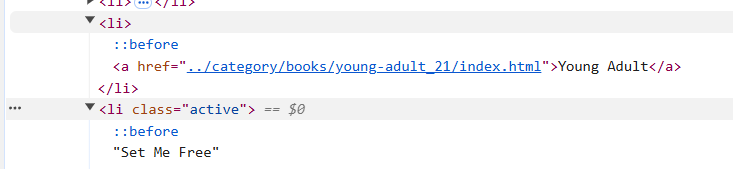

In [117]:
title=soup.find("li", class_="active").text.strip()
title

'Set Me Free'

In [148]:
li_tags=soup.find_all("li")[2].text.strip()
li_tags


'Young Adult'

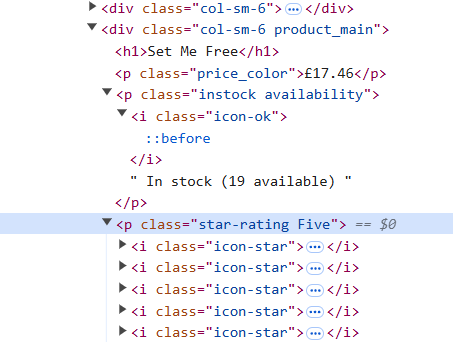

In [114]:
price=soup.find("p", class_="price_color").text.strip("£")
price

'17.46'

In [123]:
in_stock=soup.find_all("p")
availability=in_stock[1].text.strip()
availability

'In stock (19 available)'

In [132]:
soup.find_all("p")
desc=soup.find_all("p")[3].text.strip("<p> ...more</p>")
desc

'Aaron Ledbetter’s future had been planned out for him since before he was born. Each year, the Ledbetter family vacation on Tybee Island gave Aaron a chance to briefly free himself from his family’s expectations. When he meets Jonas “Lucky” Luckett, a caricature artist in town with the traveling carnival, he must choose between the life that’s been mapped out for him, and Aaron Ledbetter’s future had been planned out for him since before he was born. Each year, the Ledbetter family vacation on Tybee Island gave Aaron a chance to briefly free himself from his family’s expectations. When he meets Jonas “Lucky” Luckett, a caricature artist in town with the traveling carnival, he must choose between the life that’s been mapped out for him, and the chance at true lov'

In [139]:

upc=soup.find_all("td")[0].text.strip("<td></td>")
upc

'ce6396b0f23f6ecc'

In [141]:
import pandas as pd

UPC=[]
Title=[]
Price=[]
Genre=[]
Rating=[]
Availability=[]
Description=[]

components= soup.find_all("article", class_= "product_page")

for component in components:
    title=component.find("li", class_="active").text.strip()
    Titles.append(title)
    li_tags=component.find_all("li")
    genre=li_tags[2].text.strip()
    Genre.append(genre)
    price=component.find("p", class_="price_color").text.strip("£")
    Price.append(price)
    in_stock=component.find_all("p")
    availability=in_stock[1].text.strip()
    Availability.append(availability)
    upc=component.find_all("td")[0].text.strip("<td></td>")
    UPC.append(upc)
    descr=component.find_all("p")[3].text.strip("<p> ...more</p>")
    Description.append(description)

Book_df=pd.DataFrame({
    "Titles":Titles,
    "Genre":Genre,
    "Price":Price,
    "Availability":Availability,
    "UPC":UPC ,
    "Description": Description
})



AttributeError: 'NoneType' object has no attribute 'text'

In [149]:
import pandas as pd

UPC=[]
Title=[]
Price=[]
Genre=[]
Rating=[]
Availability=[]
Description=[]

components= soup.find_all("article", class_= "product_page")




for component in components:
    title_tag = component.find("li", class_="active")
    if title_tag:  # Ensures title_tag is not None
        title = title_tag.text.strip()
        Title.append(title)
    else:
        Title.append(None)  # or another placeholder value

    li_tags = component.find_all("li")[2].text.strip()
    Genre.append(li_tags)

    price = component.find("p", class_="price_color").text.strip("£")
    Price.append(price)

    in_stock = component.find_all("p")
    availability = in_stock[1].text.strip()
    Availability.append(availability)

    upc = component.find_all("td")[0].text.strip("<td></td>")
    UPC.append(upc)

    descr = component.find_all("p")[3].text.strip("<p> ...more</p>")
    Description.append(descr)

Book_df=pd.DataFrame({
    "Titles":Title,
    "Genre":Genre,
    "Price":Price,
    "Availability":Availability,
    "UPC":UPC ,
    "Description": Description
})



In [151]:
Book_df

,Titles,Genre,Price,Availability,UPC,Description
0,None,The Black Maria\n\n£52.15\n\n\n \n I...,17.46,In stock (19 available),ce6396b0f23f6ecc,Aaron Ledbetter’s future had been planned out ...
